In [15]:
from pulp import *

def shortest_path_LP(dist, spot, start, end):
    if start == end:
        return [], 0
    else:
        # The cost data is made into a dictionary
        dist = makeDict([spot, spot], dist, 0)
        Routes = [(out, enter) for out in spot for enter in spot]

        # Linear programming---------------------------------------------------------------------------------------------
        prob = LpProblem("Shortest Path Problem", LpMinimize)
        var = LpVariable.dicts('Route', (spot, spot), lowBound=0, upBound=1, cat='Integer')

        # Constraints
        for o in spot:
            if o == start:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 1
            elif o == end:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == -1
            else:
                prob += lpSum(var[o][e]-var[e][o] for e in spot) == 0

        # Objective function
        prob += lpSum(var[out][enter] * dist[out][enter] for (out, enter) in Routes)
        prob.solve()
        #----------------------------------------------------------------------------------------------------

        minValue = value(prob.objective)  # Optimal solution

        # obtain all the paths which varValue=1 
        vList = [] 
        for v in prob.variables():
            if v.varValue == 1:
                pointFROM = v.name.split('_')[1]
                pointTO = v.name.split('_')[2]
                vList.append([v.name, v.varValue, pointFROM, pointTO])        

        return vList, minValue


# Sorting    
def sort(vlst, sList):
    for i in vlst:
        if i[0] == sList[-1]:
            sList.append(i[1])
            return sort(vlst, sList)
        

In [12]:
import random
import numpy as np

n = 250   # number of points 
dimension = 2    
ptXY = np.random.randint(0, 300, size=[dimension, n])  # randomly generate n points

#print(ptXY)

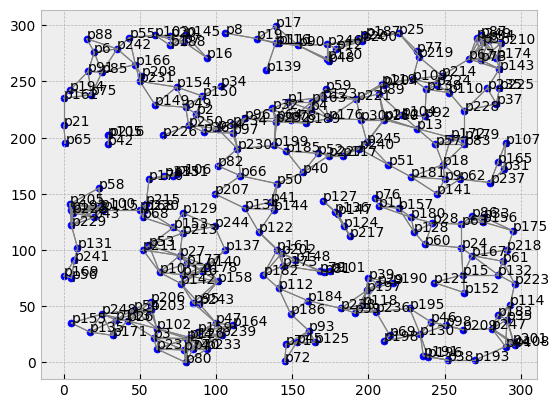

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

epsilon = 25     # identify the value for epsilon-nearest neighbors 
inf = 9999

distMtx = np.zeros((n,n), dtype=float)    # distance matrix

for i in range(n):
    for j in range(n):
        distance=0
        for d in range(dimension):
            distance += (ptXY[d][i]-ptXY[d][j])**2  
        distance = distance**0.5   # the distance between 2 points

        if distance <= epsilon:   
            if distance == 0:
                distMtx[i][j] = round(inf, 0)
            else:
                distMtx[i][j] = round(distance, 2)
        else:
            distMtx[i][j] = round(inf, 0)

x, y, = ptXY[0], ptXY[1] 

plt.style.use('bmh')   # grid lines
fig = plt.figure()
ax = plt.axes()        # scale
plt.scatter(x, y, s=25, color='b') 
    
# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X = [ptXY[0][i], ptXY[0][j]]
                Y = [ptXY[1][i], ptXY[1][j]]
                plt.plot(X, Y, color='#808080', linewidth=0.8)
                
# point name
ptName = (['p{}'.format(i+1) for i in range(n)])
for i in range(n):
    ax.annotate(ptName[i], (ptXY[0][i], ptXY[1][i]))

#print(distMtx)
#plt.savefig('C:\\Users\\')

c:\Users\johnn\AppData\Local\Programs\Python\Python311\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Route_p109_p204 = 1.0
Route_p111_p90 = 1.0
Route_p112_p184 = 1.0
Route_p114_p223 = 1.0
Route_p122_p161 = 1.0
Route_p128_p157 = 1.0
Route_p132_p167 = 1.0
Route_p144_p122 = 1.0
Route_p157_p76 = 1.0
Route_p160_p245 = 1.0
Route_p161_p173 = 1.0
Route_p167_p24 = 1.0
Route_p173_p112 = 1.0
Route_p184_p238 = 1.0
Route_p195_p46 = 1.0
Route_p19_p111 = 1.0
Route_p200_p25 = 1.0
Route_p204_p89 = 1.0
Route_p209_p247 = 1.0
Route_p219_p109 = 1.0
Route_p223_p132 = 1.0
Route_p227_p40 = 1.0
Route_p236_p195 = 1.0
Route_p238_p236 = 1.0
Route_p240_p227 = 1.0
Route_p245_p240 = 1.0
Route_p246_p200 = 1.0
Route_p247_p114 = 1.0
Route_p24_p60 = 1.0
Route_p25_p219 = 1.0
Route_p40_p50 = 1.0
Route_p46_p209 = 1.0
Route_p50_p144 = 1.0
Route_p60_p128 = 1.0
Route_p89_p160 = 1.0
Route_p8_p19 = 1.0
Route_p90_p246 = 1.0
The distance of the shortest path : 727.0
Shortest Path: p8 p19 p111 p90 p246 p200 p25 p219 p109 p204 p89 p160 p245 p240 p227 p40 p50 p144 p122 p161 p173 p112 p184 p238 p236 p195 p46 p209 p247 p114 p223 p132

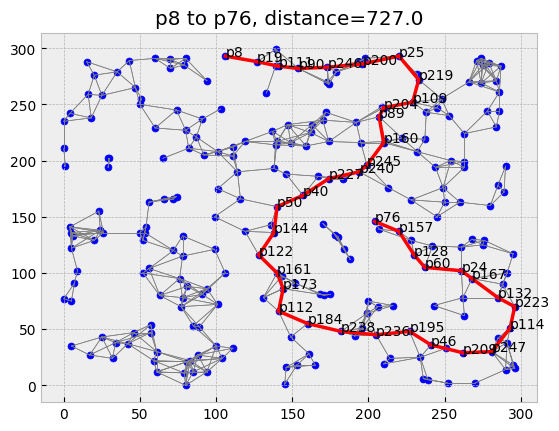

In [16]:
start, end = 'p8', 'p76'

vData, result = shortest_path_LP(distMtx, ptName, start, end)

for v in vData:
    if v[1] != 0:
        print (v[0], "=", v[1])
        
# order the path
sortedList = [start]
varlist=[]
for v in vData:
    varlist.append([v[2], v[3]])
sort(varlist, sortedList)     

if result >= inf:
    print ('The distance of the shortest path : none')
    print('There is no shortest path')
else:
    print ('The distance of the shortest path :', result)
    print('Shortest Path:', end = ' ')
    for i in sortedList:
        print(i,end = " ") 

#----------------------------plot-----------------------------------------    
plt.style.use('bmh')
ax = plt.axes() 
plt.title('{} to {}, distance={}'.format(start,end,round(result,2)))
#plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, s=25, color='b')

# adjacent lines    
for i in range(n):
    for j in range(n):
        if distMtx[i][j] <= epsilon:
            if distMtx[i][j] > 0:
                X=[ptXY[0][i],ptXY[0][j]]
                Y=[ptXY[1][i],ptXY[1][j]]
                plt.plot(X,Y, color='#808080', linewidth=0.5)     

# point names
for i in sortedList:
    p = int(i.strip('p')) -1
    ax.annotate(i,(ptXY[0][p], ptXY[1][p]))  


# shortest path
if result < inf:    
    for k in varlist:
        p = int(k[0].strip('p')) -1      
        q = int(k[1].strip('p')) -1
        X = [ptXY[0][p],ptXY[0][q]]
        Y = [ptXY[1][p],ptXY[1][q]]
        plt.plot(X,Y, color='r', linewidth=2.5)
